In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona

# set working directory
os.chdir('/Users/Naif Khaled/Documents/GitHub/COGCC-Risk-Analysis/Data')

In [3]:
data = pd.read_excel('flowlines_to_spills_mod1.xlsx')

In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OPERATOR_NUM         735 non-null    int64  
 1   LOCATION_ID          735 non-null    int64  
 2   LOCATION_TYPE        735 non-null    object 
 3   FACILITY_NAME        735 non-null    object 
 4   FLOWLINE_ID          732 non-null    float64
 5   FLOWLINE_TYPE        735 non-null    object 
 6   ENDEQUIPTYPE         735 non-null    object 
 7   TYPEOFSTARTLOCATION  735 non-null    object 
 8   STARTEQUIPTYPE       735 non-null    object 
 9   Line Age             735 non-null    float64
 10  PIPEMATERIAL         735 non-null    object 
 11  MAXOD                735 non-null    float64
 12  TYPEOFFLUIDTRANS     735 non-null    object 
 13  Risk                 735 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 80.5+ KB
None
(735, 14)


# Dataset


In [5]:
data.describe()

,OPERATOR_NUM,LOCATION_ID,FLOWLINE_ID,Line Age,MAXOD
count,735.000000,735.000000,732.000000,735.000000,735.000000
mean,25676.508844,411385.853061,466455.741803,24.446575,3.453784
std,22945.347195,67213.972776,7407.089083,15.272864,2.910454
min,7125.000000,159844.000000,455244.000000,4.369863,1.000000
25%,10459.000000,321505.000000,461024.750000,13.035616,2.000000
50%,10633.000000,448669.000000,461755.500000,18.131507,2.375000
75%,46290.000000,460789.500000,474833.250000,39.104110,3.000000
max,100322.000000,479291.000000,480500.000000,69.487671,16.000000


In [6]:
print(data)

     OPERATOR_NUM  LOCATION_ID          LOCATION_TYPE  \
0           74165       322147  Production Facilities   
1           74165       322147  Production Facilities   
2           46290       446484  Production Facilities   
3           10633       446484  Production Facilities   
4           46290       446484  Production Facilities   
..            ...          ...                    ...   
730         39560       319065  Production Facilities   
731         39560       319065  Production Facilities   
732         39560       319065  Production Facilities   
733         35080       443145  Production Facilities   
734         39560       318928  Production Facilities   

                           FACILITY_NAME  FLOWLINE_ID  FLOWLINE_TYPE  \
0    SARTI-66S63W                            473951.0  Wellhead Line   
1    SARTI-66S63W                            473951.0  Wellhead Line   
2    GRANT                                   471657.0  Wellhead Line   
3    GRANT                 

# Turning text columns into numbers

In [7]:
data_transformed = pd.get_dummies(data, columns=['OPERATOR_NUM', 'LOCATION_ID', 'LOCATION_TYPE', 'FACILITY_NAME', 'FLOWLINE_ID', 'FLOWLINE_TYPE', 'ENDEQUIPTYPE', 'TYPEOFSTARTLOCATION', 'STARTEQUIPTYPE', 'PIPEMATERIAL', 'TYPEOFFLUIDTRANS'])

for col in data_transformed.columns:
    if pd.api.types.is_numeric_dtype(data_transformed[col]):
        data_transformed[col] = data_transformed[col].astype(int)
    else:
        # Handle or report non-numeric columns
        print(f"Column {col} is not numeric.")

data_transformed['Risk'] = data_transformed['Risk'].map({'H': 1, 'M/L': 0})

print(data_transformed)

Column Risk is not numeric.
     Line Age  MAXOD  Risk  OPERATOR_NUM_7125  OPERATOR_NUM_8960  \
0          46      3     1                  0                  0   
1          46      3     1                  0                  0   
2          45      3     1                  0                  0   
3          45      3     1                  0                  0   
4          45      3     1                  0                  0   
..        ...    ...   ...                ...                ...   
730        11      2     0                  0                  0   
731        41      2     0                  0                  0   
732        41      2     0                  0                  0   
733         6      3     0                  0                  0   
734        41      3     0                  0                  0   

     OPERATOR_NUM_10017  OPERATOR_NUM_10071  OPERATOR_NUM_10112  \
0                     0                   0                   0   
1                    

# Some Visualizations

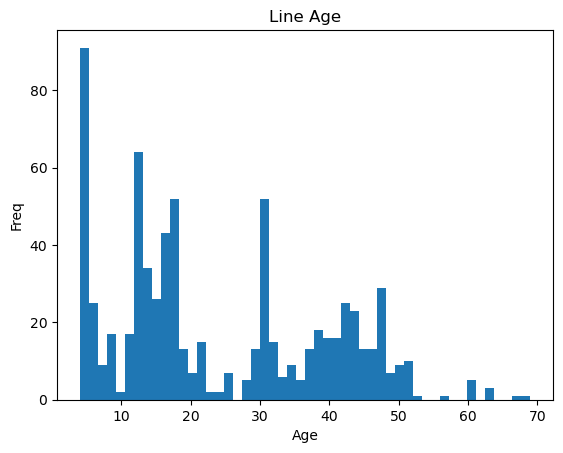

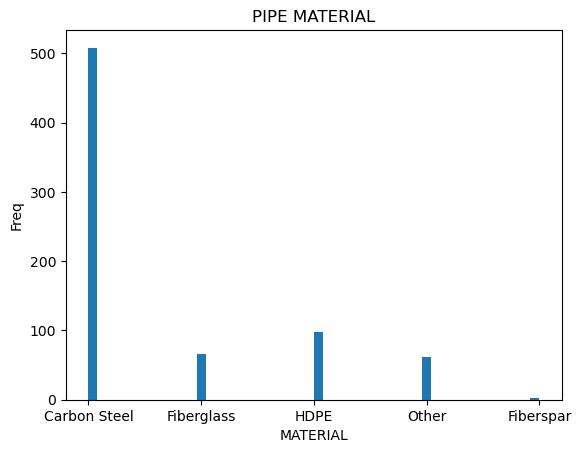

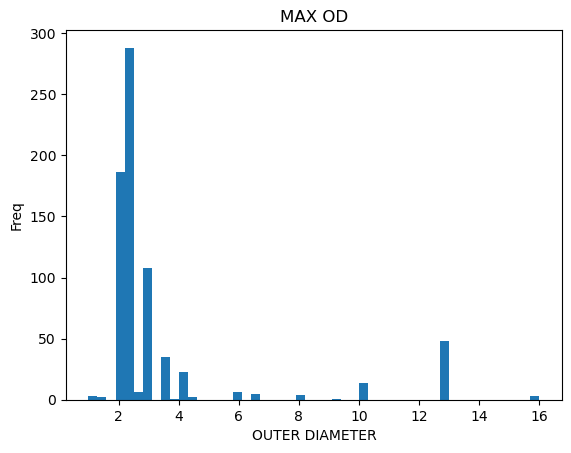

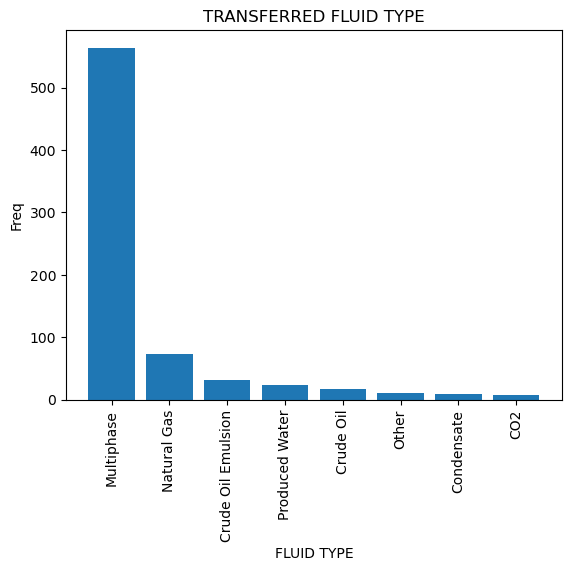

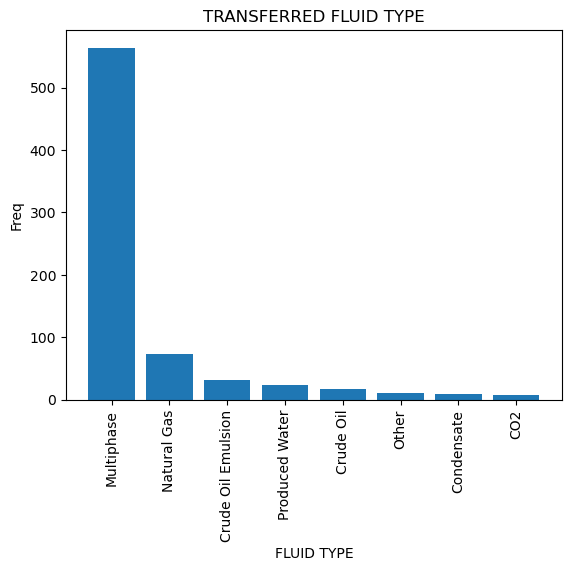

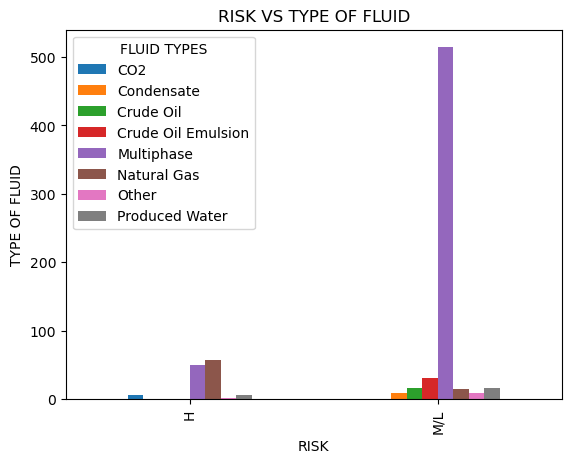

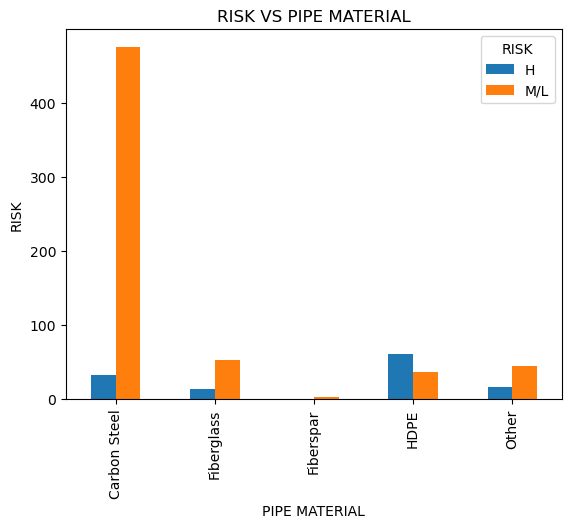

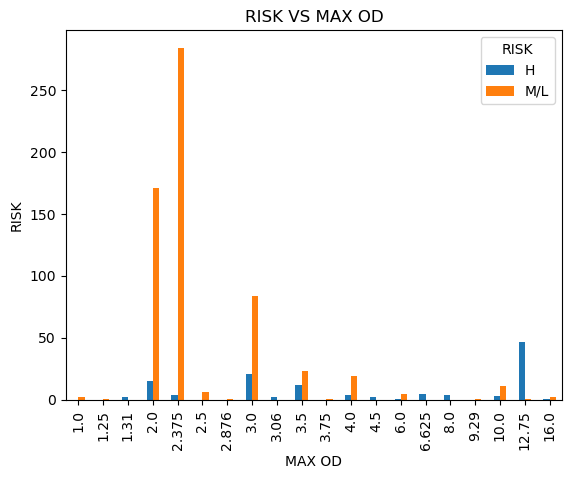

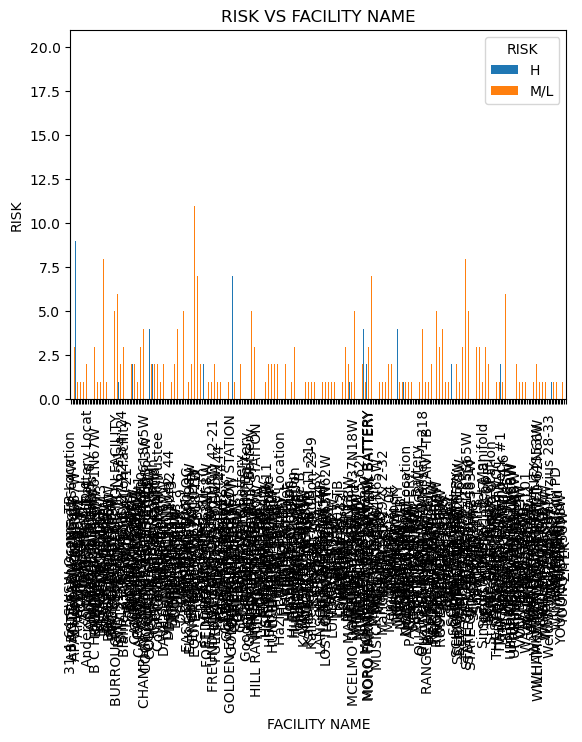

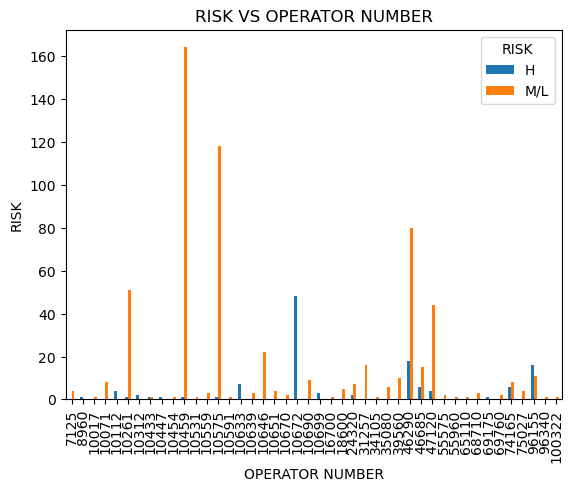

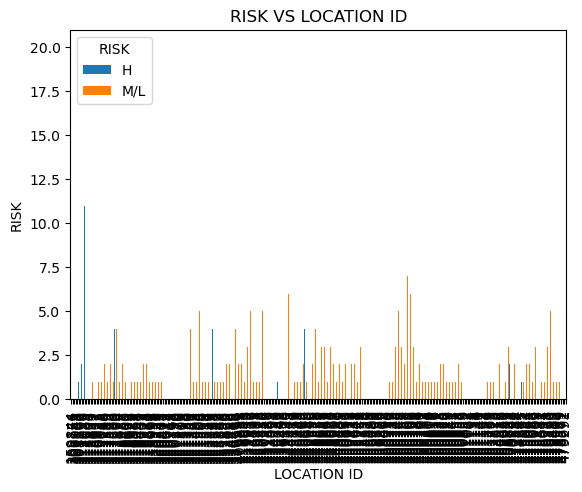

In [8]:
plt.hist(data_transformed['Line Age'], bins=50)
plt.xlabel('Age'); plt.ylabel('Freq'); plt.title('Line Age')
plt.show()

plt.hist(data['PIPEMATERIAL'], bins=50)
plt.xlabel('MATERIAL'); plt.ylabel('Freq'); plt.title('PIPE MATERIAL')
plt.show()

plt.hist(data['MAXOD'], bins=50)
plt.xlabel('OUTER DIAMETER'); plt.ylabel('Freq'); plt.title('MAX OD')
plt.show()


category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()



category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()




counts = data.groupby(['Risk', 'TYPEOFFLUIDTRANS']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='Risk', columns='TYPEOFFLUIDTRANS', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('RISK')
plt.ylabel('TYPE OF FLUID') 
plt.title('RISK VS TYPE OF FLUID') 
plt.legend(title='FLUID TYPES')
plt.show()

counts = data.groupby(['PIPEMATERIAL', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='PIPEMATERIAL', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('PIPE MATERIAL')
plt.ylabel('RISK') 
plt.title('RISK VS PIPE MATERIAL') 
plt.legend(title='RISK')
plt.show()



counts = data.groupby(['MAXOD', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='MAXOD', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('MAX OD')
plt.ylabel('RISK') 
plt.title('RISK VS MAX OD') 
plt.legend(title='RISK')
plt.show()


counts = data.groupby(['FACILITY_NAME', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='FACILITY_NAME', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('FACILITY NAME')
plt.ylabel('RISK') 
plt.title('RISK VS FACILITY NAME') 
plt.legend(title='RISK')
plt.show()

counts = data.groupby(['OPERATOR_NUM', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='OPERATOR_NUM', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('OPERATOR NUMBER')
plt.ylabel('RISK') 
plt.title('RISK VS OPERATOR NUMBER') 
plt.legend(title='RISK')
plt.show()

counts = data.groupby(['LOCATION_ID', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='LOCATION_ID', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('LOCATION ID')
plt.ylabel('RISK') 
plt.title('RISK VS LOCATION ID') 
plt.legend(title='RISK')
plt.show()


# Machine Learning Models (Non-Transformed Data)

In [19]:
inputs = data_transformed.drop('Risk', axis=1)
target = data_transformed['Risk']

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(inputs, target, test_size = 0.3)

X = np.asarray(trainX)
y = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

# 1-K Means

# K-Means (Unsupervised)

C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 2 clusters: 0.6804491747950959


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 3 clusters: 0.5971841997241419


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 4 clusters: 0.5683621895552067


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 5 clusters: 0.6332983695451947


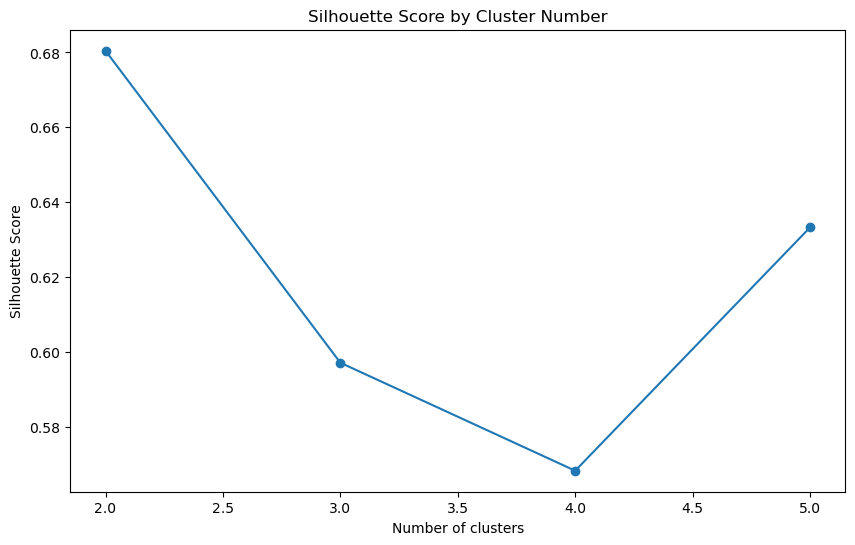

C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


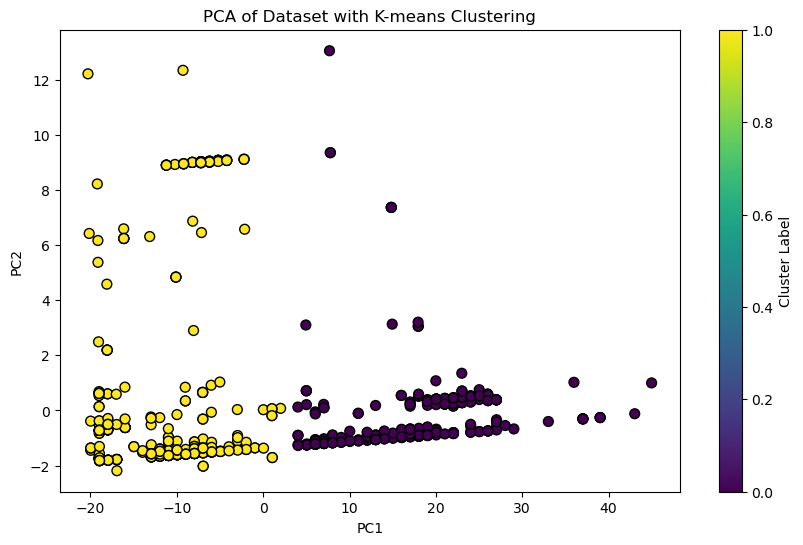

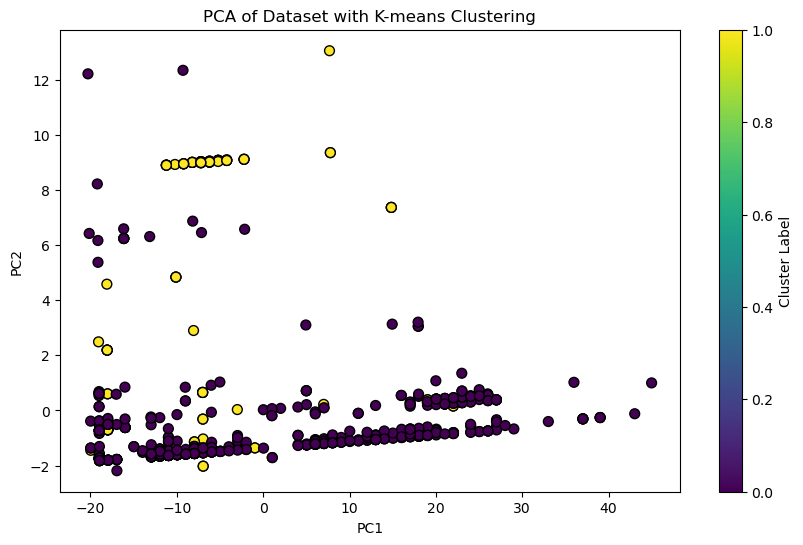

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn as sk

# Assume `data_transformed` is already loaded and preprocessed

# Split the data into inputs and target
inputs = data_transformed.drop('Risk', axis=1)
output = data_transformed['Risk']

# Define PCA with 2 components and transform inputs
pca = PCA(n_components=2)
inputs_pca = pca.fit_transform(inputs)

# Range of clusters to try
clusters_range = [2, 3, 4, 5]
silhouette_scores = []

for n_clusters in clusters_range:
    # Create K-means model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(inputs_pca)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(inputs_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Cluster Number')
plt.show()

# Choose one model to visualize, e.g., 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
y_hat = kmeans.fit_predict(inputs_pca)

# Plot PC1 vs PC2 with cluster assignment
plt.figure(figsize=(10, 6))
plt.scatter(inputs_pca[:, 0], inputs_pca[:, 1], c=y_hat, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Dataset with K-means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(inputs_pca[:, 0], inputs_pca[:, 1], c=output, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Dataset with K-means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()